<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Michael\\Documents\\git\\U4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [65]:
# borrowed this from another student... didn't help my problem, but I kept it anyway... XD

def wrangle(df):
    df = df.copy()
    
    df['star_rating'] = df['star_rating'].str.replace('star rating', '').astype(float)
    
    df['date'] = df['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")
    df['date'] = pd.to_datetime(df['date'])
    
    df['full_review_text'] = df['full_review_text'].str.replace('(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)', '')
    df['full_review_text'] = df['full_review_text'].str.replace('(\d*)', '').str.strip().str.lstrip('check-in ')
#     df['full_review_text'] = df['full_review_text'].apply(lambda x: x.lower())
    
#     df['coffee_shop_name'] = df['coffee_shop_name'].str.strip()
    
    df['positive_review'] = df['star_rating'] >= 4.0
    
    return df

In [66]:
df = wrangle(shops)
df.head()

,coffee_shop_name,full_review_text,star_rating,date,positive_review
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5.0,2016-11-25,True
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,2016-12-02,True
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0,2016-11-30,True
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2.0,2016-11-25,False
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0,2016-12-03,True


In [67]:
# df.sample(1)

,coffee_shop_name,full_review_text,star_rating,date,positive_review
4337,Sa-Ten,cute little place! has some really cold shops ...,4.0,2016-05-13,True


In [62]:
# first need to filter for the assigned Coffee Shop:

gj_df = df[df['coffee_shop_name'] == 'Genuine Joe']
gj_df.head()

# hmm... empty table? okay finally got it. Didn't have "Coffeshop" at the end of the name...

,coffee_shop_name,full_review_text,star_rating,date,positive_review
5241,Genuine Joe,seriously the best iced chai in austin. i am ...,5.0,2016-11-27,True
5242,Genuine Joe,room nice. plain coffee meh. they have intri...,4.0,2016-11-06,True
5243,Genuine Joe,the artist group i belong to had a planning me...,4.0,2016-08-25,True
5244,Genuine Joe,i came here because it was the highest rated c...,4.0,2016-06-09,True
5245,Genuine Joe,hands down my favorite coffee shop in austin. ...,5.0,2016-11-23,True


In [76]:
# hmm... only 100 reviews...
gj_df.shape

(100, 5)

In [68]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [69]:
nlp = spacy.load("en_core_web_lg")

In [73]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [ ]:
# How can we count the raw text?
# df['full_review_text'].value_counts(normalize=True)[:10]

# interesting...

In [80]:
# Okay, IMPORTANT: tokenizing all the words in the reviews...

gj_df['tokens'] = gj_df['full_review_text'].apply(tokenize)

In [81]:
# hmm... not much here, oh well.
gj_df.shape

(100, 6)

In [83]:
# So much magic... 

# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
gj_df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)


# Haven't yet applied stop words... all pretty common.

[('the', 446),
 ('and', 331),
 ('a', 283),
 ('i', 254),
 ('to', 223),
 ('of', 161),
 ('is', 156),
 ('in', 135),
 ('coffee', 134),
 ('it', 120)]

In [78]:
# didn't even look at it... great function writen by jon-cody. Okay, sure.
# makes a pretty dataframe that gives stats on different words. Cute.

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [84]:
# Use the fancy Function above
wc = count(gj_df['tokens'])

In [85]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,93,446,1.0,0.046702,0.046702,0.93
51,and,92,331,2.0,0.034660,0.081361,0.92
57,a,84,283,3.0,0.029634,0.110995,0.84
49,i,78,254,4.0,0.026597,0.137592,0.78
53,to,71,223,5.0,0.023351,0.160942,0.71


In [86]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.32293193717277474

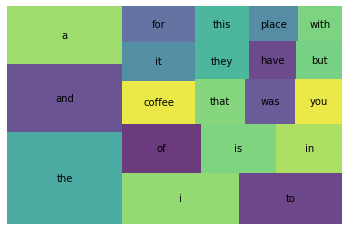

In [87]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [94]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [96]:
# This is really important: looks at every word in "Tokens" and determines if it's a 
# stop word. If it's NOT, then it includes it back into our df (excludes stop words)

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(gj_df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

gj_df['tokens'] = tokens

In [98]:
# Hell yes! It worked.
gj_df.tokens.head()

5241    [seriously, best, iced, chai, austin.,  , coff...
5242    [room, nice.,  , plain, coffee, meh.,  , intri...
5243    [artist, group, belong, planning, meeting, eas...
5244    [came, highest, rated, coffee, shop, near, tim...
5245    [hands, favorite, coffee, shop, austin., vibe,...
Name: tokens, dtype: object

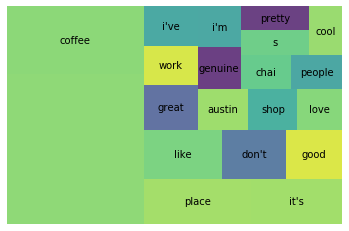

In [99]:
wc = count(gj_df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Well damn. Need to add to that stop words list.

In [180]:
# IF I want to include more, I need to make a union with this new list of stop words

STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'i\'ll', 'it.', '..', 'place', 'don\'t', '-', 'it\'s', 'i\'ve', 'i\'m', 'austin', 'genuine', 's', ' '])

In [181]:
# Rerunning the tokenizer function with more stop words...

tokens = []

for doc in tokenizer.pipe(gj_df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
gj_df['tokens'] = tokens

In [171]:
wc = count(gj_df['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,like,32,45,1.0,0.010475,0.010475,0.32
289,good,25,32,2.0,0.007449,0.017924,0.25
16,great,26,29,3.0,0.006750,0.024674,0.26
68,work,22,25,4.0,0.005819,0.030493,0.22
185,shop,19,24,5.0,0.005587,0.036080,0.19
334,love,20,22,6.0,0.005121,0.041201,0.20
3,chai,14,20,7.0,0.004655,0.045857,0.14
13,people,20,20,8.0,0.004655,0.050512,0.20
115,pretty,15,19,9.0,0.004423,0.054935,0.15
139,cool,14,19,10.0,0.004423,0.059358,0.14


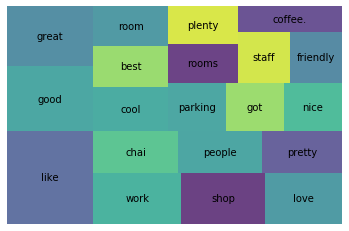

In [149]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [121]:
gj_df['star_rating'].value_counts()

5.0    40
4.0    35
3.0    11
2.0     8
1.0     6
Name: star_rating, dtype: int64

C:\Users\Michael\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


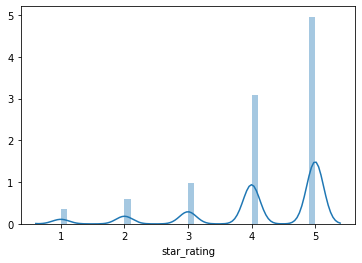

In [122]:
sns.distplot(df['star_rating']);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [182]:
bad = gj_df[gj_df['star_rating'] < 4.0]
good = gj_df[gj_df['star_rating'] > 3.0]
ugly = gj_df[gj_df['star_rating'] == 1.0]

In [183]:
wc_g = count(good['tokens'])
wc_b = count(bad['tokens'])
wc_u = count(ugly['tokens'])

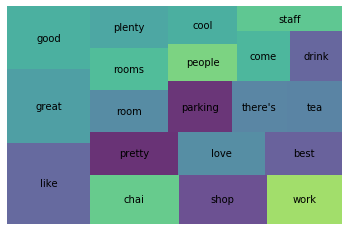

In [184]:
wc_top20 = wc_g[wc_g['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

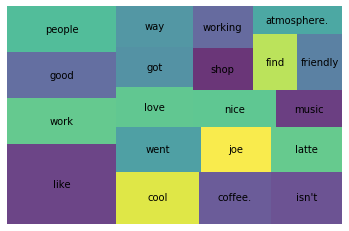

In [185]:
wc_top20 = wc_b[wc_b['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

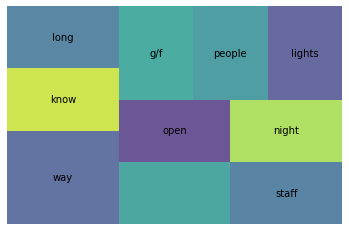

In [186]:
wc_top20 = wc_u[wc_u['rank'] <= 10]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [187]:
ugly['tokens']

5258    [sitting, gj, right, drinking, worst, american...
5261    [got, way, mocha, keeps, raving, here,, chokin...
5270    [stars, meeting, space, coffee/food, barely, s...
5272    [grungy,, slow, service, bored, girl., quiet, ...
5277    [tried, late, night, weekend, visiting, austin...
5300    [went, saturday, night, :, homework, finished....
Name: tokens, dtype: object

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

